In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from torch.utils.data import DataLoader
import torch
import numpy as np
import anndata as ad
import scanpy as sc
import matplotlib.pyplot as plt

### 需要可视化的基因和样本需要从08-计算基因的p值那个地方找

#### 下面是可视化特定样本与基因的代码，操作时，需要修改下列preds_list ct_list gt_list的位置，以及图像的img-path，还有想要可视化基因的名称

In [18]:
import numpy as np
import anndata as ad
#thitogene需要加squeeze（0），sc-guide不需要
# preds_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/HER2/C4/preds.npy').squeeze(0)
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/HER2/C4/center.npy').squeeze(0)
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/HER2/C4/gts.npy').squeeze(0)

# preds_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/HER2/C4/preds.npy')
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/HER2/C4/center.npy')
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/HER2/C4/gts.npy')

# preds_list=np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/C4/preds.npy')
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/C4/center.npy')
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_HER2-resnet34_as_img_encoder/C4/gts.npy')

preds_list=np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/CSCC/P2_ST_rep2/preds.npy').squeeze(0)
ct_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/CSCC/P2_ST_rep2/center.npy').squeeze(0)
gt_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/CSCC/P2_ST_rep2/gts.npy').squeeze(0)

# print(ct_list.shape)
# ct_list = ct_list.reshape()
adata = ad.AnnData(preds_list)
adata.obsm['spatial'] = ct_list
adata_gt = ad.AnnData(gt_list)
adata_gt.obsm['spatial'] = ct_list

In [19]:
# predicted_gene_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/01-her2数据集/her_hvg_cut_1000.npy'
predicted_gene_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/03-CSCC/skin_hvg_cut_169.npy'
gene_list = list(np.load(predicted_gene_path,allow_pickle=True))
adata.var_names = gene_list
adata_gt.var_names = gene_list

In [20]:
img_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/9-鳞状细胞癌-GSE144239_RAW-但分辨率较低-可能做测试用/SCC_data/img_dir/P2_ST_rep2.jpg'
# img_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/HER2-images/HE/A2.jpg'
import cv2
img = cv2.imread(img_path)


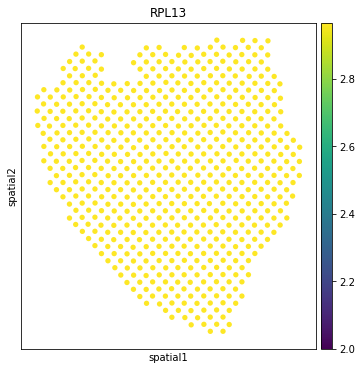

In [57]:
fig,ax=plt.subplots(figsize=(10,6))
# sc.pl.spatial(adata,img=img,color='RPL13',vmax=2,spot_size=150,show=False,ax=ax)
sc.pl.spatial(adata,color='RPL13',vmax=2,spot_size=150,show=False,ax=ax)
plt.savefig('/2data/liyixin/HE2ST/04Results/07-高预测的4个基因可视化/cscc/03-thitogene/RPL13/RPL13_no_image.png')

[<AxesSubplot:title={'center':'RPL13'}, xlabel='spatial1', ylabel='spatial2'>]

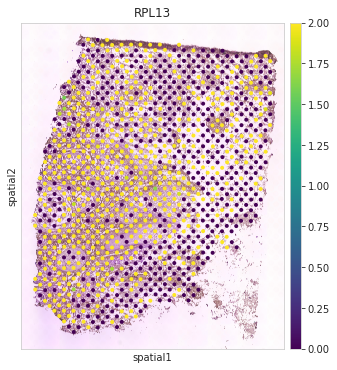

In [17]:
fig,ax=plt.subplots(figsize=(10,6))
sc.pl.spatial(adata_gt,color='RPL13',img=img,vmax=2,spot_size=150,show=False,ax=ax,cmap='viridis',alpha_img=0.8)
# plt.savefig('/2data/liyixin/HE2ST/04Results/07-高预测的4个基因可视化/her2/label/C3_no_image.png')

In [8]:
from matplotlib.colors import LinearSegmentedColormap
colors = [(0, '#00008B'),  # 红色
          (0.33,'#FFFFFF'),
          (0.5, '#FFFFFF'),  # 绿色
          (0.66,'#FFFFFF'),
          (1, '#8B0000')]  # 蓝色
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors)


[<AxesSubplot:title={'center':'RPL13'}, xlabel='spatial1', ylabel='spatial2'>]

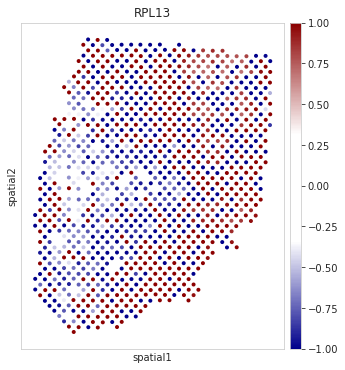

In [15]:
#计算pred-label的差值的绝对值作为adata_diff
adata_diff=ad.AnnData(preds_list-gt_list)
adata_diff.obsm['spatial'] = ct_list
adata_diff.var_names = gene_list
fig,ax=plt.subplots(figsize=(10,6))
# sc.pl.spatial(adata,img=img,color='RPL13',vmax=2,spot_size=150,show=False,ax=ax)
sc.pl.spatial(adata_diff,color='RPL13',vmin=-1,vmax=1,spot_size=150,show=False,ax=ax,color_map=cmap)#seismic
# plt.savefig('/2data/liyixin/HE2ST/04Results/07-高预测的4个基因可视化/her2/01-SC-guide/IGHA1/IGHA1_long_threshold.png')

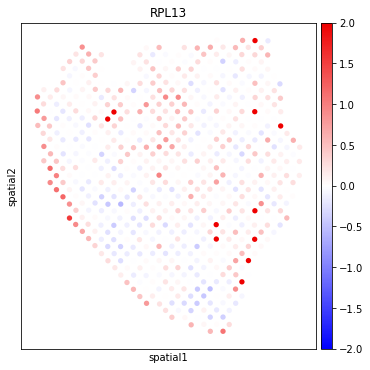

In [59]:
#计算pred-label的差值的绝对值作为adata_diff
adata_diff=ad.AnnData(preds_list-gt_list)
adata_diff.obsm['spatial'] = ct_list
adata_diff.var_names = gene_list
fig,ax=plt.subplots(figsize=(10,6))
# sc.pl.spatial(adata,img=img,color='RPL13',vmax=2,spot_size=150,show=False,ax=ax)
# sc.pl.spatial(adata_diff,color='C3',vmax=2,spot_size=100,show=False,ax=ax,palette='Set1')
sc.pl.spatial(adata_diff,color='RPL13',vmin=-2,vmax=2,spot_size=150,show=False,ax=ax,color_map=cmap)
plt.savefig('/2data/liyixin/HE2ST/04Results/07-高预测的4个基因可视化/cscc/03-thitogene/RPL13/RPL13_diff_red_blue.png')

### 用median pcc最高的sample来聚类

In [4]:
#找一下所有gene平均p值最低的样本
import pandas as pd
import numpy as np
p_path = '/2data/liyixin/HE2ST/04Results/05-不同方法生成的预测和真实表达矩阵/cscc/01-sc-guide/sc-guide_pcc.csv'
p_df=pd.read_csv(p_path,index_col=0)
p_mean=[]
for i in range(len(p_df)):
    p_mean.append(np.mean(p_df.iloc[i,:]))
p_df.loc[:,'mean']=p_mean
p_df.nlargest(3,'mean')
#通过基因平均p值来找，最小的两个样本仍然是B2和B4，与最高pcc一致

,PPP1R12A,S100P,IMP4,KRT2,SOX4,SAMD4B,SPPL2A,RALBP1,RAB3GAP2,TNRC6A,...,NF1,TIMP3,NHP2,ZBTB7A,DDX18,FLG,NEMF,DYNC1I2,KCTD1,mean
P2_ST_rep2,0.292223,0.042267,0.455457,0.197195,0.315204,0.235790,0.409813,0.459335,0.301905,0.351877,...,0.332469,0.283764,0.447094,0.419960,0.362097,0.386434,0.317972,0.430684,0.515262,0.396004
P2_ST_rep3,0.284280,0.113549,0.417461,0.157619,0.352996,0.245116,0.390753,0.454737,0.345557,0.304350,...,0.405280,0.303481,0.435617,0.444810,0.449961,0.224229,0.420594,0.388986,0.484392,0.388853
P2_ST_rep1,0.269496,0.143289,0.381533,0.169425,0.291657,0.277633,0.352632,0.412799,0.307003,0.334437,...,0.306015,0.362161,0.437474,0.395819,0.356514,0.397623,0.282939,0.340619,0.529566,0.365495


# 从这里开始做聚类可视化

In [41]:
import numpy as np
import anndata as ad
#thitogene需要加squeeze（0），sc-guide不需要
# preds_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/CSCC/P2_ST_rep2/preds.npy').squeeze(0)
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/CSCC/P2_ST_rep2/center.npy').squeeze(0)
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/CSCC/P2_ST_rep2/gts.npy').squeeze(0)

# preds_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_resnet34_as_img_encoder/B4/preds.npy')
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_resnet34_as_img_encoder/B4/center.npy')
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_resnet34_as_img_encoder/B4/gts.npy')
# 
# preds_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/224/B4/preds.npy')
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/224/B4/center.npy')
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/224/B4/gts.npy')

# preds_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_CSCC/P2_ST_rep2/preds.npy')
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_CSCC/P2_ST_rep2/center.npy')
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_CSCC/P2_ST_rep2/gts.npy')
preds_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/CSCC/P2_ST_rep2/preds.npy')
ct_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/CSCC/P2_ST_rep2/center.npy')
gt_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/CSCC/P2_ST_rep2/gts.npy')

adata = ad.AnnData(preds_list)
adata.obsm['spatial'] = ct_list
adata_gt = ad.AnnData(gt_list)
adata_gt.obsm['spatial'] = ct_list

In [42]:
#如果是preds.npy,用1000，pred_781.npy,用781的gene-list
# predicted_gene_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/data/her_hvg_cut_1000.npy'
predicted_gene_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/03-CSCC/skin_hvg_cut_169.npy'
gene_list = list(np.load(predicted_gene_path,allow_pickle=True))
adata.var_names = gene_list
adata_gt.var_names = gene_list

In [43]:
# img_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/HER2-images/HE/B4.jpg'
img_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/9-鳞状细胞癌-GSE144239_RAW-但分辨率较低-可能做测试用/SCC_data/img_dir/P2_ST_rep2.jpg'
import cv2
img = cv2.imread(img_path)

In [172]:
# sc.pp.pca(adata)
# sc.pp.neighbors(adata)
# sc.tl.umap(adata,)
# sc.tl.leiden(adata,resolution=0.2,key_added='clusters')

In [173]:
# sc.pp.pca(adata_gt)
# sc.pp.neighbors(adata_gt)
# sc.tl.umap(adata_gt)
# sc.tl.leiden(adata_gt,resolution=0.5,key_added='clusters')

### 这种将pred和label结合起来聚类再分开的方式是有效的

In [44]:
adata_combine=adata.concatenate(adata_gt)
adata_combine

AnnData object with n_obs × n_vars = 1292 × 169
    obs: 'batch'
    obsm: 'spatial'

In [45]:
sc.pp.pca(adata_combine)
sc.pp.neighbors(adata_combine)
sc.tl.umap(adata_combine)
sc.tl.leiden(adata_combine,resolution=1,key_added='clusters')
# sc.tl.leiden(adata_combine,key_added='clusters')

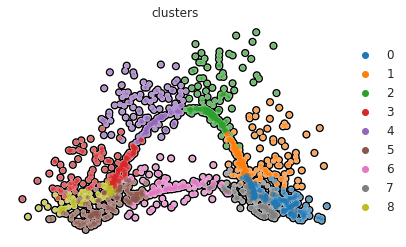

In [46]:
sc.pl.umap(adata_combine, color=[ "clusters"], wspace=0.4,add_outline=True,legend_fontsize=12, legend_fontoutline=2,frameon=False,)

In [47]:
adata_1=adata_combine[adata_combine.obs['batch']=='0'].copy()
adata_2=adata_combine[adata_combine.obs['batch']=='1'].copy()
adata_1.obs['cluster'] = adata_1.obs['clusters']
adata_2.obs['cluster'] = adata_2.obs['clusters']


In [48]:
from sklearn import metrics
preds_clusters=adata_1.obs['cluster']
label_clusters=adata_2.obs['cluster']
ari=metrics.adjusted_rand_score(label_clusters,preds_clusters)
ari

0.22898944302619972

[<AxesSubplot:title={'center':'clusters'}, xlabel='spatial1', ylabel='spatial2'>]

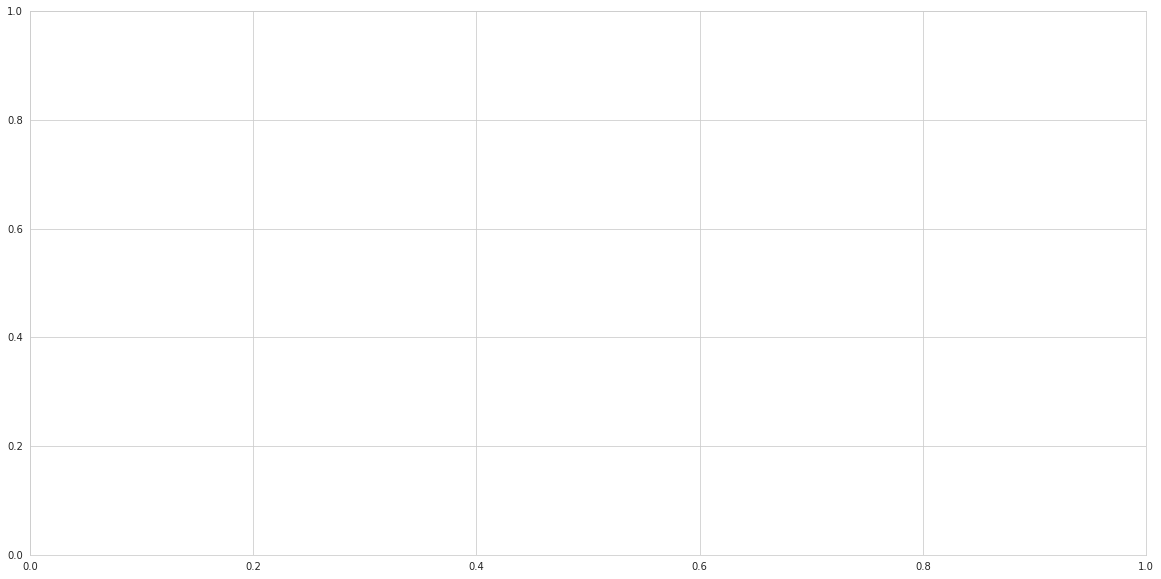

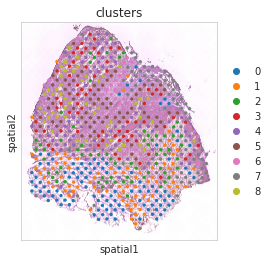

In [49]:
fig,ax=plt.subplots(figsize=(20,10))
sc.pl.spatial(adata_1, img=img, color="clusters", alpha=1, size=1.3,show=False,spot_size=112,alpha_img=0.7)
# plt.savefig('/2data/liyixin/HE2ST/04Results/08-marker基因聚类/cscc/01-sc-guide/01-默认resolution1/P5_ST_rep1.png')

[<AxesSubplot:title={'center':'clusters'}, xlabel='spatial1', ylabel='spatial2'>]

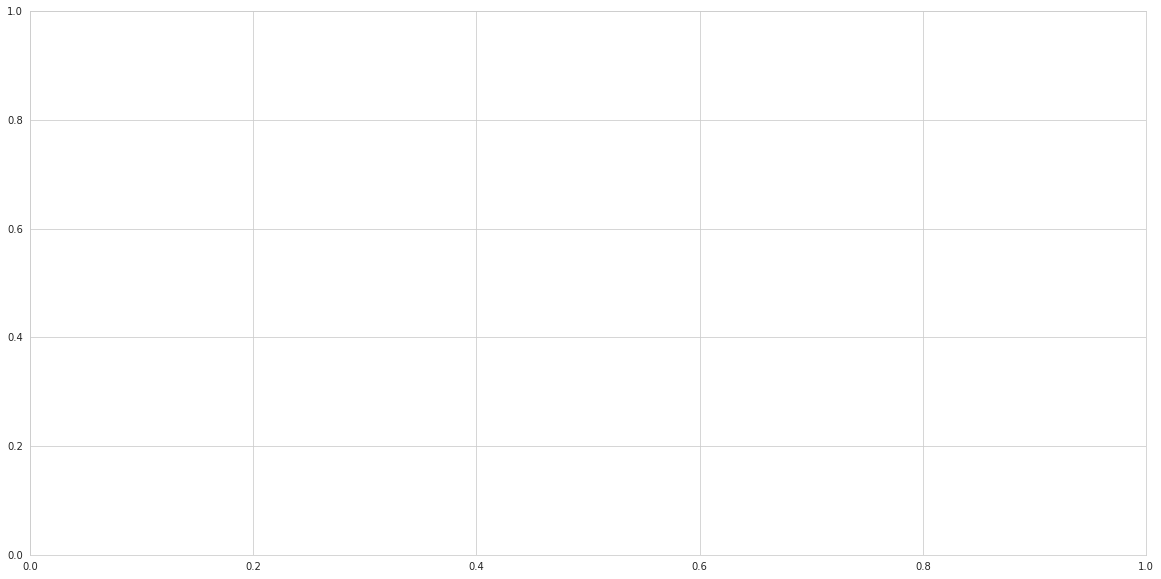

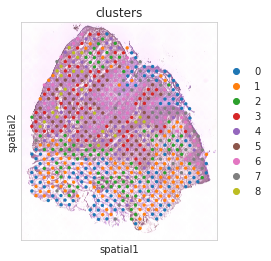

In [50]:
fig,ax=plt.subplots(figsize=(20,10))
sc.pl.spatial(adata_2, img=img, color="clusters", alpha=1, size=1.3,show=False,spot_size=112,alpha_img=0.7)
# plt.savefig('/2data/liyixin/HE2ST/04Results/08-marker基因聚类/cscc/01-sc-guide/01-默认resolution1/label/P5_ST_rep1.png')

#### 到这里结束

## 尝试可视化某一种细胞类型

In [2]:
import numpy as np
import anndata as ad
#thitogene需要加squeeze（0），sc-guide不需要
# preds_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/B2/preds.npy').squeeze(0)
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/B2/center.npy').squeeze(0)
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/04-THItoGene/B2/gts.npy').squeeze(0)

preds_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_resnet34_as_img_encoder/B4/preds.npy')
ct_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_resnet34_as_img_encoder/B4/center.npy')
gt_list = np.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_resnet34_as_img_encoder/B4/gts.npy')
# 
# preds_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/224/B4/preds.npy')
# ct_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/224/B4/center.npy')
# gt_list = np.load('/2data/liyixin/HE2ST/04Results/01-TCGN-used-for-cntrast/224/B4/gts.npy')
adata = ad.AnnData(preds_list)
adata.obsm['spatial'] = ct_list
adata_gt = ad.AnnData(gt_list)
adata_gt.obsm['spatial'] = ct_list

In [3]:
#如果是preds.npy,用1000，pred_781.npy,用781的gene-list
predicted_gene_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/data/her_hvg_cut_1000.npy'
gene_list = list(np.load(predicted_gene_path,allow_pickle=True))
adata.var_names = gene_list
adata_gt.var_names = gene_list

In [4]:
img_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/HER2-images/HE/B4.jpg'
import cv2
img = cv2.imread(img_path)

In [35]:
sc.pp.pca(adata_gt)
sc.pp.neighbors(adata_gt)
sc.tl.umap(adata_gt)
sc.tl.leiden(adata_gt,resolution=1.5,key_added='clusters')

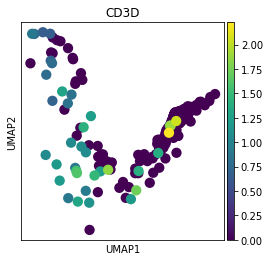

In [36]:
from matplotlib.pyplot import rc_context
with rc_context({'figure.figsize': (4, 4)}):
    sc.pl.umap(adata_gt, color='CD3D')

In [37]:
marker_genes_dict = {
    'B-cell': ['CD79A'],
    'T-cell': ['CD3D'],
}


In [38]:
sc.pl.dotplot(adata_gt, marker_genes_dict, 'clusters', dendrogram=True)


ValueError: Incompatible observations. Dendrogram data has 5 categories but current groupby observation ['clusters'] contains 10 categories. Most likely the underlying groupby observation changed after the initial computation of `sc.tl.dendrogram`. Please run `sc.tl.dendrogram` again.'

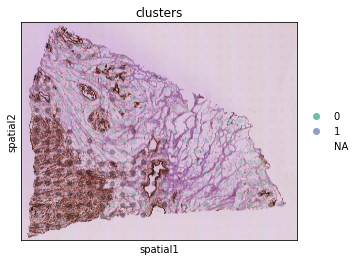

In [15]:
sc.pl.spatial(adata, img=img, color="clusters", groups=["0", "1"], alpha=0.3, size=1.3,spot_size=112)


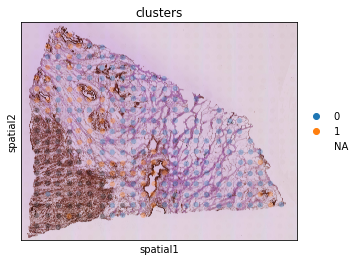

In [42]:
sc.pl.spatial(adata_gt, img=img, color="clusters", groups=["0", "1"], alpha=0.3, size=1.3,spot_size=112)

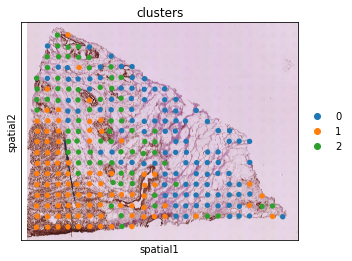

In [150]:
sc.pl.spatial(adata, img=img, color="clusters", alpha=1, size=1.3,spot_size=112)

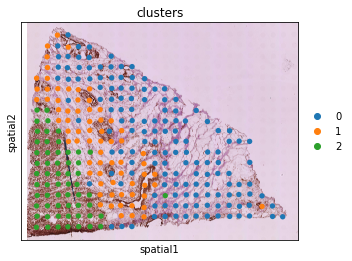

In [151]:
sc.pl.spatial(adata_gt, img=img, color="clusters", alpha=1, size=1.3,spot_size=112)

In [74]:
#相当于是上面那些代码串起来后的
from SingleCell_Ref.singleCell_models.sc_guide_model import Sc_Guide_Model_with_CNNSASM
from torch.utils.data import DataLoader
import torch
import numpy as np
import anndata as ad
model = Sc_Guide_Model_with_CNNSASM('resnet34')
model.load_state_dict(torch.load('/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/03-without_TCGN_as_ImgEncoder/03-CNN-SASM/FINAL_MODEL_resnet34_as_img_encoder/A2/A2-ST_Net-Sc_Guide_Model_with_CNN_SASM-best.pth'))
model.to('cuda:0')
model.eval()
from connect_test import Initiate_dataset
patch_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/01-her2数据集/01-gen-patch/'
exp_label_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/01-her2数据集/02-gene-exp-label/'
ref_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/01-her2数据集/04-singlecell_ref/filter_her2_ref.csv'
predicted_gene_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/data/her_hvg_cut_1000.npy'
seg_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/01-her2数据集/03-patch-segResult/json/'
orig_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/01-her2数据集/05-orig_exp/'
center_path = '/2data/liyixin/HE2ST/04Results/02-单细胞参考预测基因表达/01-data/01-her2数据集/06-center/'
# dataset = HER2_dataset(patch_path,exp_label_path,predicted_gene_path,ref_path,seg_path,'train',0)
datatest = Initiate_dataset(patch_path,exp_label_path,orig_path,center_path,'test',0)
dataloder = DataLoader(datatest,batch_size=1,shuffle=False)
preds_list = []
gt_list = []
ct_list = []
with torch.no_grad():
    for item in dataloder:
        patch_name, imgs, orig_exp, genes,center = item[0],item[1],item[2],item[3],item[4]
        imgs,orig_exp = imgs.to('cuda:0'),orig_exp.to('cuda:0')
        pred = model(imgs,orig_exp)
        preds_list.append(pred.squeeze().cpu().detach().numpy())
        gt_list.append(genes.squeeze().detach().numpy())
        ct_list.append(center.squeeze().detach().numpy())
preds_list = np.concatenate(preds_list,axis=0)
gt_list = np.concatenate(gt_list,axis=0)
ct_list = np.concatenate(ct_list,axis=0)
adata = ad.AnnData(preds_list)
adata.obsm['spatial'] = ct_list
adata_gt = ad.AnnData(gt_list)
adata_gt.obsm['spatial'] = ct_list
predicted_gene_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/data/her_hvg_cut_1000.npy'
gene_list = list(np.load(predicted_gene_path,allow_pickle=True))
adata.var_names = gene_list
adata_gt.var_names = gene_list

#加载图像
img_path = '/2data/liyixin/HE2ST/02dataset/公共数据集/01-HER2+/her2st-master/data/ST-imgs/A/A2/9769_C2_HE_small.jpg'
import cv2
img = cv2.imread(img_path)

#可视化,分两步做
sc.pl.spatial(adata,img=img,color='SCD',vmax=2,spot_size=112)

sc.pl.spatial(adata_gt,img=img,color='SCD',vmax=2,spot_size=112)

ModuleNotFoundError: No module named 'SingleCell_Ref'